In [3]:
#IMPORTS
import numpy as np
import os,sys,math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+"/Code") # so that we can import the modules below
#feel free to have a look into Network, Layer or RBM implementations to see how they work
from NN import Network,Layer,pretrain_autoencoder, plot_results
from RBM import RBM
#DATASETS DIRECTORIES
MNIST_TRAIN_DIR="./Data/MNIST1_train.npz"
MNIST_TEST_1_DIR="./Data/MNIST1_test_1.npz"
MNIST_TEST_2_DIR="./Data/MNIST1_test_2.npz"
PATCHES_DIR="./Data/PATCHES.npy"

### Load Mnist Dataset

In [4]:
from sklearn import preprocessing
#load the MNIST dataset
#train dataset for A1,A2,A3,A8,A9
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]

#test dataset for A1,A2,A3
x_test =  np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_0"]
y_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_1"]
#test dataset for A8,A9
x_test_2 =  np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_0"]
y_test_2 = np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_1"]

x_train, x_val  = np.split(X, [int(.8 * len(X))])
y_train, y_val = np.split(y, [int(.8 * len(y))])
x_test_2 = x_test_2/255

# y_test = y_test.reshape(y_test.shape[0],1)
y_test_2 = y_test_2.reshape(y_test_2.shape[0],1)
# y_train = y_train.reshape(y_train.shape[0],1)
# y_val = y_val.reshape(y_val.shape[0],1)

## Part 1. Data Compression

### <span style="color:red">=========== Assignment 1 ===========</span>

150:	 train err: 0.01942	 val err: 0.02361	 patience: 0	

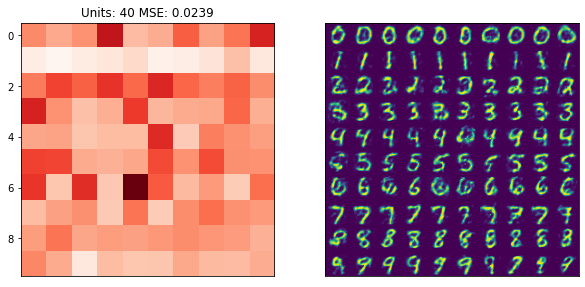

150:	 train err: 0.00974	 val err: 0.01481	 patience: 4	

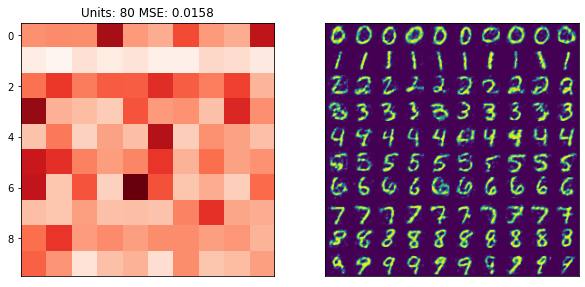

150:	 train err: 0.00363	 val err: 0.00819	 patience: 2	

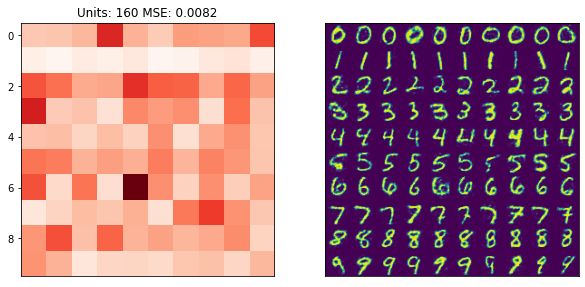

150:	 train err: 0.00181	 val err: 0.0047	 patience: 0		

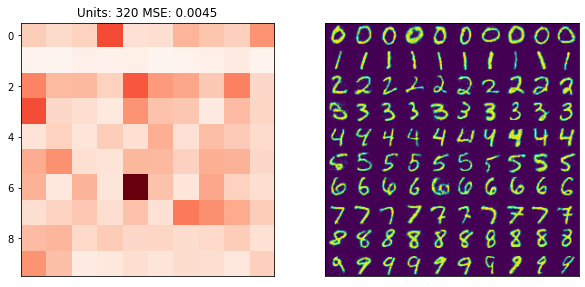

In [3]:
#Create a NN, tie its weights using the function:
#Network.tie_weights(layer_index_1,layer_index_2)
#Remember to do this before calling fit()!
#To visualize the results, use:
#plot_results(Network,data,hidden_units)
#Remember to record your results for A4!
hidden_arch = [40,80,160,320]

NN_AE_MEAN = []
for hidden_count in hidden_arch:
    NN_AE = Network([784,hidden_count,784],activations=["sigmoid"]) #define a network architecture & activation
    NN_AE.set_lr(1,momentum=0.0)  #set learning rate and momentum
    NN_AE.tie_layer_weights(1, 3) # tie its weights
    NN_AE.fit(x_train,x_train,batch_size=100,patience=25,
           epochs=150,x_val=x_val,y_true_val=x_val)
    # record the result
    NN_AE_MEAN.append(plot_results(NN_AE,x_test,hidden_count))

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

150:	 train err: 0.01884	 val err: 0.02321	 patience: 2	

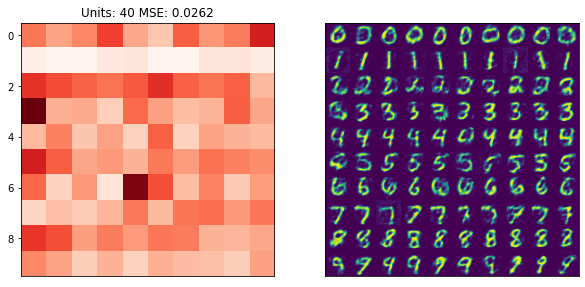

150:	 train err: 0.00963	 val err: 0.01497	 patience: 0	

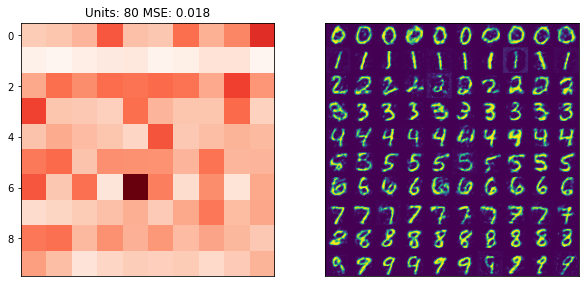

150:	 train err: 0.00405	 val err: 0.00899	 patience: 8	

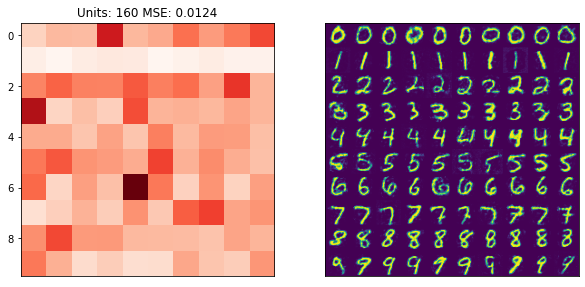

150:	 train err: 0.00197	 val err: 0.00568	 patience: 1	

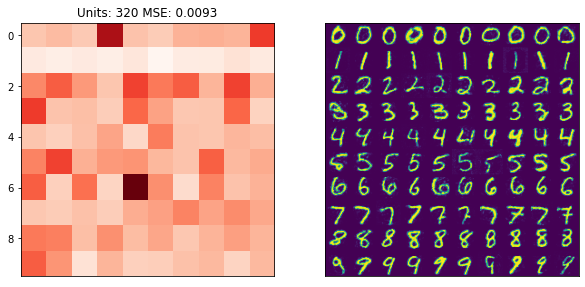

In [4]:
#Train a DAE

#add gaussian noise to data 
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.1, size=x_train.shape)
x_val_noisy = x_val + np.random.normal(loc=0.0, scale=0.1, size=x_val.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.1, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)     # limit into [0, 1]
x_val_noisy = np.clip(x_val_noisy, 0., 1.)     
x_test_noisy = np.clip(x_test_noisy, 0., 1.)   

# record the results
NN_DAE_MEAN = []
for hidden_count in hidden_arch:
    NN_DAE = Network([784,hidden_count,784],activations=["sigmoid"]) #define a network architecture & activation
    NN_DAE.set_lr(1,momentum=0.0)  #set learning rate and momentum
    NN_DAE.tie_layer_weights(1, 3)
    NN_DAE.fit(x_train_noisy,x_train,batch_size=100,patience=25,
           epochs=150,x_val=x_val_noisy,y_true_val=x_val)
    
    NN_DAE_MEAN.append(plot_results(NN_DAE,x_test_noisy,hidden_count))

### <span style="color:red">=========== End of Assignment 2 ===========</span>

### <span style="color:red">=========== Assignment 3 ===========</span>

117:	 train err: 0.04233	 val err: 0.04364	 patience: 25	
 Patience condition reached,best validation performance: 0.04307394326264888


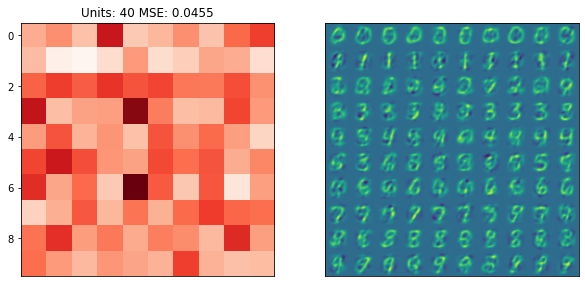

100:	 train err: 0.04368	 val err: 0.04574	 patience: 25	
 Patience condition reached,best validation performance: 0.044324728434279134


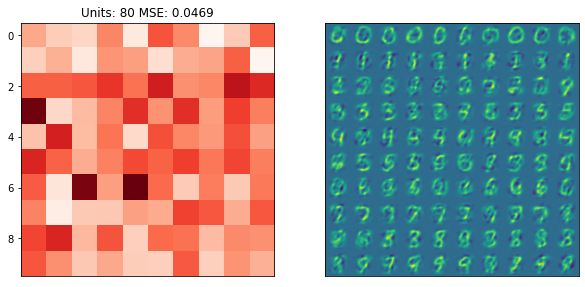

70:	 train err: 0.04589	 val err: 0.04716	 patience: 25	
 Patience condition reached,best validation performance: 0.04602173401624858


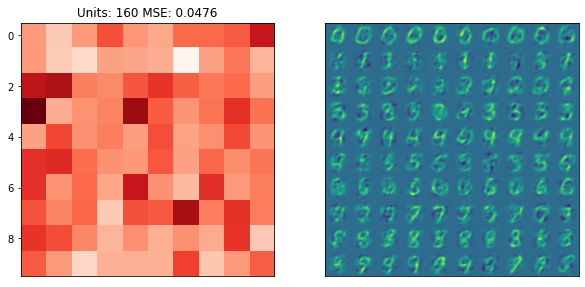

67:	 train err: 0.05057	 val err: 0.05141	 patience: 25	
 Patience condition reached,best validation performance: 0.05024929919596092


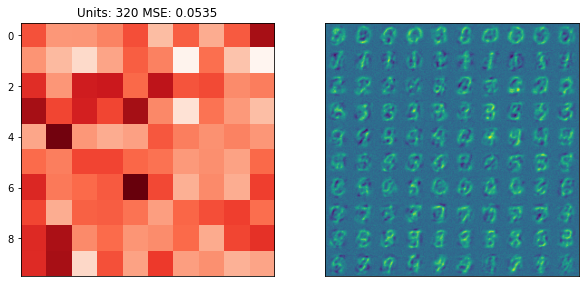

In [5]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units

# record the results.
RBM_MEAN = []
for hidden_count in hidden_arch:
    NN_RBM = RBM(n_vis=784,n_hid=hidden_count,use_gaussian_visible_sampling=True,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
    NN_RBM.set_lr(0.01,momentum=0.5)  #set learning rate and momentum
    NN_RBM.fit(x=x_train,x_val=x_val,batch_size=100,patience=25,
           epochs=1500)
    RBM_MEAN.append(plot_results(NN_RBM,x_test,hidden_count))

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### Describe for Assignment 1 to 3
#### (a) describe how you train the AE with a provided function on the training dataset in a mark-up cell; 
I split the data set into  x_train and x_val. In assignment 1 and 2, I set up a network in which the input layer and output layer have 784 neurons, and the hidden layer is in the range of [40,80,160,320]. In assignment 3, the visible layer has 784 neurons, too.

#### (c) display the reconstructed images of 100 test instances created with the best AE of the minimum averaged MSE by arranging images in a 10 grid where each row corresponds to a digit label.
In assignment 1 and 2, the best AE both have 320 hidden neurons, but in assignment 3, the best AE has 40 hidden neurons.

### <span style="color:red">=========== Assignment 4 ===========</span>

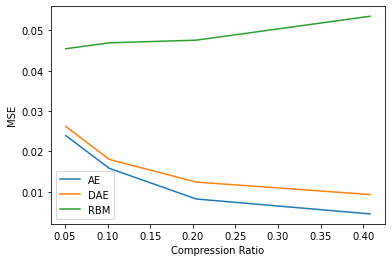

In [6]:
#Create a plot comparing compression power of different AE
import math
compression_ratio = []
for i in hidden_arch:
    compression_ratio.append(i/X.shape[1])

plt.figure()
plt.xlabel("Compression Ratio")
plt.ylabel("MSE")
plt.plot(compression_ratio,NN_AE_MEAN,label='AE')
plt.plot(compression_ratio,NN_DAE_MEAN,label='DAE')
plt.plot(compression_ratio,RBM_MEAN,label='RBM')
plt.legend() 

#### Based on results shown in this plot, state which AE performs the best in your answer notebook
The traditional AE performs the best.

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

466:	 train err: 0.02786	 val err: 0.02979	 patience: 25	
 Patience condition reached,best validation performance: 0.029786088710848504


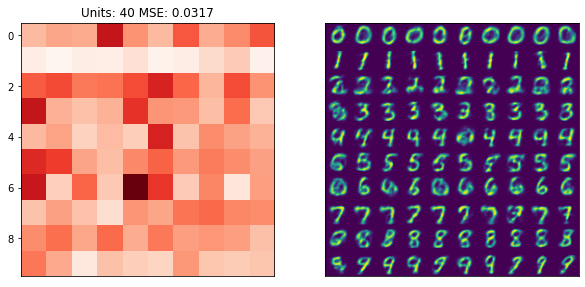

704:	 train err: 0.0179	 val err: 0.02133	 patience: 25		
 Patience condition reached,best validation performance: 0.02113043078144321


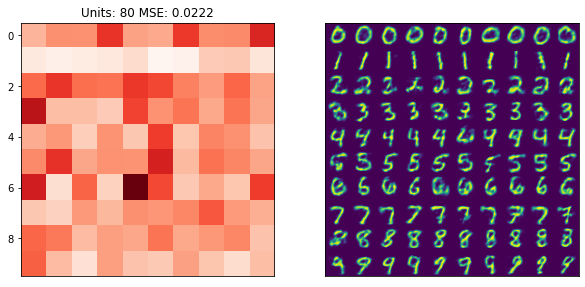

669:	 train err: 0.01191	 val err: 0.01544	 patience: 25	
 Patience condition reached,best validation performance: 0.015318161480325065


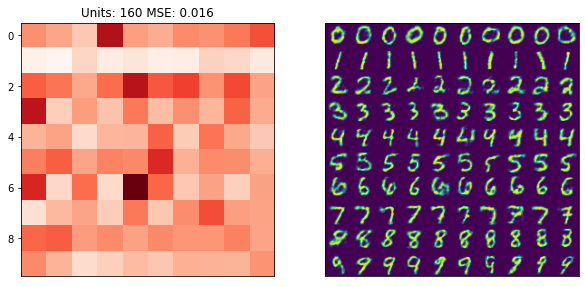

860:	 train err: 0.00799	 val err: 0.01145	 patience: 25	
 Patience condition reached,best validation performance: 0.011415989311674094


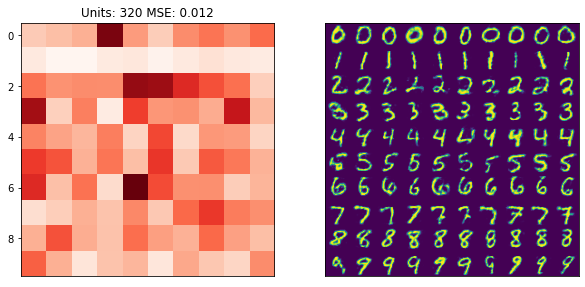

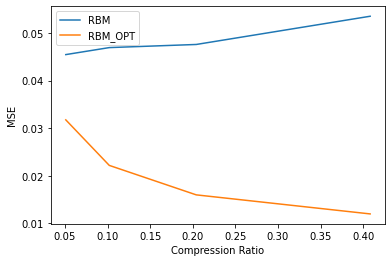

In [7]:
RBM_MEAN_OPT = []
for hidden_count in hidden_arch:
    NN_RBM = RBM(n_vis=784,n_hid=hidden_count,use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
    NN_RBM.set_lr(0.01,momentum=0.5)  #set learning rate and momentum
    NN_RBM.fit(x=x_train,x_val=x_val,batch_size=100,patience=25,
           epochs=1500)
    RBM_MEAN_OPT.append(plot_results(NN_RBM,x_test,hidden_count))

plt.figure()
plt.xlabel("Compression Ratio")
plt.ylabel("MSE")
plt.plot(compression_ratio,RBM_MEAN,label='RBM')
plt.plot(compression_ratio,RBM_MEAN_OPT,label='RBM_OPT')
plt.legend() 

####  how can you significantly improve its performance reported in Assignment 3?
Set use_gaussian_visible_sampling=False, and then the performance can improve significantly because the output of the sigmoid function is almost binary and discrete, so we should use the binomial visible layer. 

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 2. Spatial Filer Learning

### <span style="color:red">=========== Assignment 6 ===========</span>

In [5]:
#Complete the for loop from the display_filters function that visualizes the NN weights.
#To access any Network weights, use the following syntax: 
#Network.layers[layer_index].w
def display_mean_activation(nn,x,n_units=50):
    """
    Plots a scatter plot of mean activation of the first n_units neurons of the first hidden layer.
    nn - a Network class object
    x - data on which to measure the mean activation
    n_units - how many activations are meant to be displayed
    """
    plt.figure(figsize=(5,5))
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    plt.scatter(np.arange(n_units),mean_activations)
    plt.xlim(int(-n_units/10),int(n_units+n_units/6))
    plt.xlabel("Hidden units")
    plt.ylabel("Mean activation")
    plt.show()
    
def display_filters(nn):
    """
    Complete a function that visualizes the weights inside
    the second hidden layer of the nn in a 10x10 grid.
    Use the plt.subplot() to create 100 subplots.
    nn - a Network class object
    """
    # get the weight of the hidden layer
    weights = nn.layers[1].w.T
    print(weights.shape)
    #100*64
    plt.figure(figsize=(7,7))
    for i in range(100):
        #COMPLETE BELOW, IT CAN TAKE MORE OR LESS LINES THAN 3
        plt.subplot(10,10,i+1)
        plt.axis('off')
        plt.imshow(np.reshape(weights[i],(8,8)),'bwr')
    plt.show()

In [9]:
#Load and preprocess the dataset
# 10000*8*8
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
#Here, you have to preprocess the dataset
X_patches = np.reshape(X_patches,(100000,64))

# normalise the pixels to the range (0,1)
X_patches = X_patches/255

length = len(X_patches)
# split the data into train,val and test
x_patches_train,x_patches_val,x_patches_test  = np.split(X_patches, [int(.6 * length),int(.8 * length)])

rho: 0.11, lambda: 0.08
60:	 train err: 0.00325	 val err: 0.00344	 patience: 1	

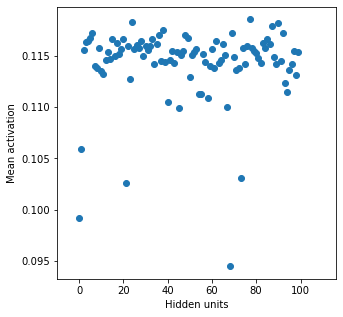

(100, 64)


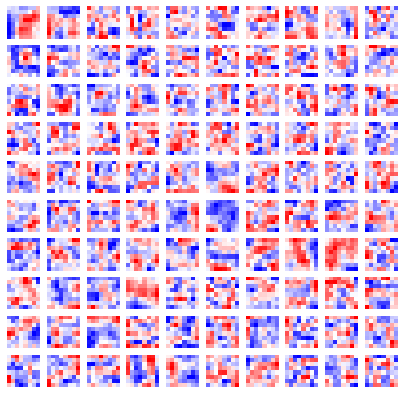

rho: 0.19, lambda: 0.19


/Users/guohuanjie/Documents/UoM Learning/COMP61021 Representation Learning/Part4 Autoencoder/coursework/AE_student/Code/NN.py:81: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-x))
/Users/guohuanjie/Documents/UoM Learning/COMP61021 Representation Learning/Part4 Autoencoder/coursework/AE_student/Code/NN.py:86: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-self.saved_x))


49:	 train err: 0.00456	 val err: 0.00742	 patience: 10	
 Patience condition reached,best validation performance: 0.0036586831054899447


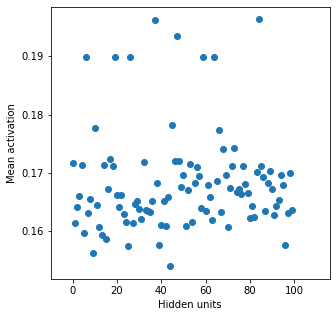

(100, 64)


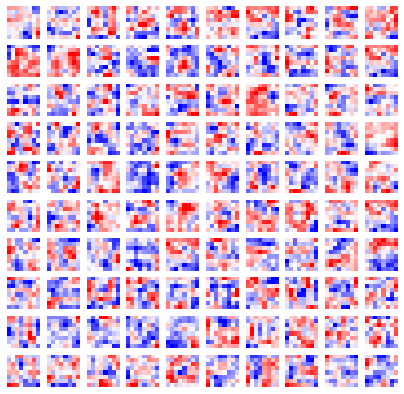

rho: 0.27, lambda: 0.18
60:	 train err: 0.0033	 val err: 0.00462	 patience: 1		

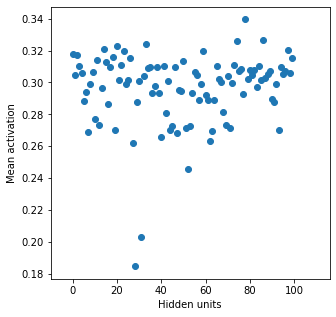

(100, 64)


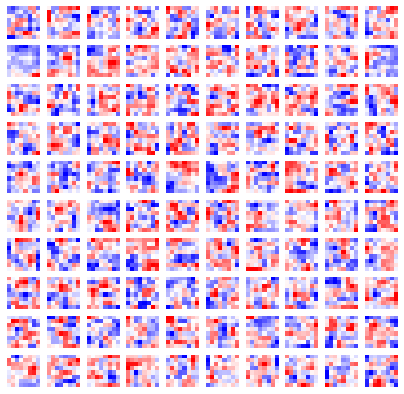

In [10]:
#Do some hyperparameter search for lambda and rho here.
# To enable sparsity, use:
# Network.layers[activation_layer_id].enable sparsity(lambda,rho)
#Use Network.get_summary() to print network layers' summary
#Use display_mean_activation and display_filters to visualize your results

# 0.01 < rho < 0.4 and 0.001 < lamda < 1.0

# rho = 0.11  lambda = 0.08
#  rho = 0.19  lambda = 0.19
# rho = 0.27 lambda 0.18
rankList = []
for rho,lamb in [[0.11,0.08],[0.19,0.19],[0.27,0.18]]:
        print("rho: %s, lambda: %s"%(rho,lamb))
        NN_SAE = Network([64,100,64],activations=["sigmoid"])
        NN_SAE.set_lr(1,momentum=0.5)  #set learning rate and momentum
        NN_SAE.layers[2].enable_sparsity(lamb,rho)
        NN_SAE.fit(x_patches_train,x_patches_train,batch_size=500,patience=10,
               epochs=60,x_val=x_patches_val,y_true_val=x_patches_val)
        
        display_mean_activation(NN_SAE,x_patches_test,100)
        display_filters(NN_SAE)

#### (a) implement a function that normalises the grey-level intensity of pixels to the range [0,1] within each patch image;
X_patches = X_patches/255
#### (c)point out which one corresponds to the best learned spatial filters.
(c) I plot (rho = 0.11  lambda = 0.08) (p = 0.19,lambda = 0.19) (p = 0.27,lambda = 0.18) above, and the (rho = 0.11  lambda = 0.08) corresponds to the best learned spatial filters.

### <span style="color:red">=========== End of Assignment 6 ===========</span>

### <span style="color:red">=========== Assignment 7 ===========</span>

60:	 train err: 0.00145	 val err: 0.00127	 patience: 2	

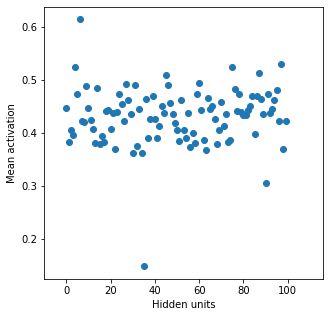

(100, 64)


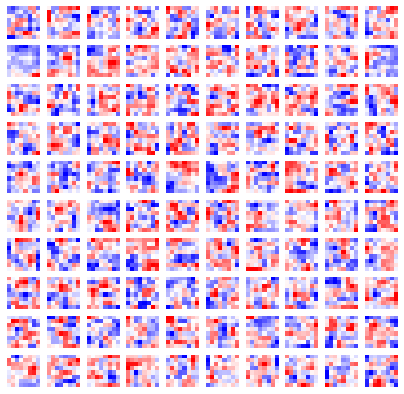

In [11]:
#Produce some results for network without sparsity constraint.
NN_NAE = Network([64,100,64],activations=["sigmoid"])
NN_NAE.set_lr(1,momentum=0.5)  #set learning rate and momentum
NN_NAE.fit(x_patches_train,x_patches_train,batch_size=500,patience=10,
       epochs=60,x_val=x_patches_val,y_true_val=x_patches_val)
# tied - weight
NN_NAE.tie_layer_weights(1, 3)
display_mean_activation(NN_NAE,x_patches_test,100)
display_filters(NN_SAE)

### <span style="color:red">=========== End of Assignment 7 ===========</span>

## Part 3. Visualization

### <span style="color:red">=========== Assignment 8 ===========</span>

In [33]:
# Define the network architecture and use the pretrain_autoencoder function to pretrain it.
Deep_AE = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid"])
res = pretrain_autoencoder(net=Deep_AE
                     ,x=x_train
                     ,x_val=x_val  # validation set 
                     ,rbm_lr=0.1
                     ,rbm_use_gauss_visible=False
                     ,rbm_use_gauss_hidden=False
                     ,rbm_mom=0.5
                     ,rbm_weight_decay=0.0
                     ,rbm_lr_decay=0.0
                     ,rbm_batch_size=100
                     ,rbm_epochs=500
                     ,rbm_patience=25)


Fine tuning layer number 0
160:	 train err: 0.00675	 val err: 0.01054	 patience: 25	
 Patience condition reached,best validation performance: 0.010389805896547116

Fine tuning layer number 1
361:	 train err: 0.01061	 val err: 0.01505	 patience: 25	
 Patience condition reached,best validation performance: 0.014927292939524744

Fine tuning layer number 2
181:	 train err: 0.01003	 val err: 0.01401	 patience: 25	
 Patience condition reached,best validation performance: 0.013900383031618245

Fine tuning layer number 3
34:	 train err: 0.15899	 val err: 0.15272	 patience: 25	
 Patience condition reached,best validation performance: 0.14936181339338753
Pre training finished!


In [39]:
import copy
result = []
# tune the learning rate.
for lr in np.arange (0.03,0.2,0.03):
    print('lr : %s'%lr)
    Deep_AE_Copy = copy.deepcopy(Deep_AE)
    Deep_AE_Copy.set_lr(lr,momentum=0.5)
    Deep_AE_Copy.fit(x_train,x_train,batch_size=100,patience=25,
        epochs=1000,x_val=x_val,y_true_val=x_val)
    result.append([lr,np.min(Deep_AE_Copy.val_err_hist)])
    print(result)

lr : 0.03
170:	 train err: 0.05666	 val err: 0.05977	 patience: 25	
 Patience condition reached,best validation performance: 0.05975075629579264
[[0.03, 0.05975075629579264]]
lr : 0.06
447:	 train err: 0.04678	 val err: 0.05319	 patience: 25	
 Patience condition reached,best validation performance: 0.05301169732402304
[[0.03, 0.05975075629579264], [0.06, 0.05301169732402304]]
lr : 0.09
279:	 train err: 0.04804	 val err: 0.05488	 patience: 25	
 Patience condition reached,best validation performance: 0.05232819992496714
[[0.03, 0.05975075629579264], [0.06, 0.05301169732402304], [0.09, 0.05232819992496714]]
lr : 0.12
385:	 train err: 0.04177	 val err: 0.04651	 patience: 25	
 Patience condition reached,best validation performance: 0.04635845654863244
[[0.03, 0.05975075629579264], [0.06, 0.05301169732402304], [0.09, 0.05232819992496714], [0.12, 0.04635845654863244]]
lr : 0.15
334:	 train err: 0.04129	 val err: 0.05162	 patience: 25	
 Patience condition reached,best validation performance: 0

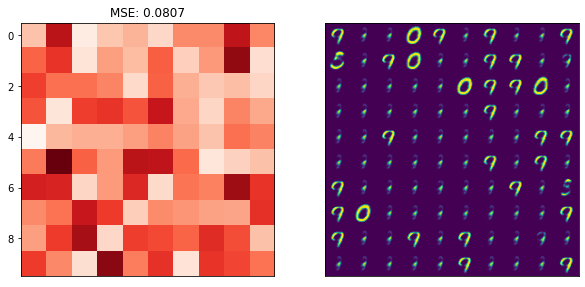

321:	 train err: 0.04427	 val err: 0.05351	 patience: 25	
 Patience condition reached,best validation performance: 0.04778087999237378


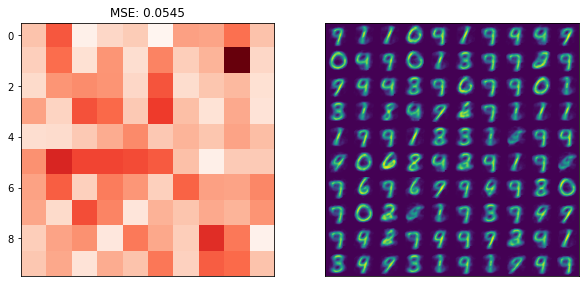

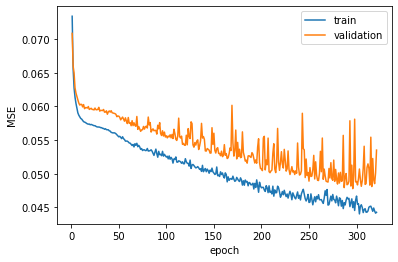

In [40]:
# Fine-tune the pre-trained autoencoder. You can also use the plot_results function from A1
# to visualize the reconstructions before and after fine-tuning

# before fine tuning
plot_results(Deep_AE,x_test_2)

# we found the learning rate of 0.12 can perform well.
Deep_AE.set_lr(0.12,momentum=0.5)
Deep_AE.fit(x_train,x_train,batch_size=100,patience=25,
        epochs=1000,x_val=x_val,y_true_val=x_val)
# after fine tuning
plot_results(Deep_AE,x_test_2)

plt.figure()
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.plot(range(1,len(Deep_AE.train_err_hist)+1),Deep_AE.train_err_hist,label='train')
plt.plot(range(1,len(Deep_AE.val_err_hist)+1),Deep_AE.val_err_hist,label='validation')
plt.legend() 


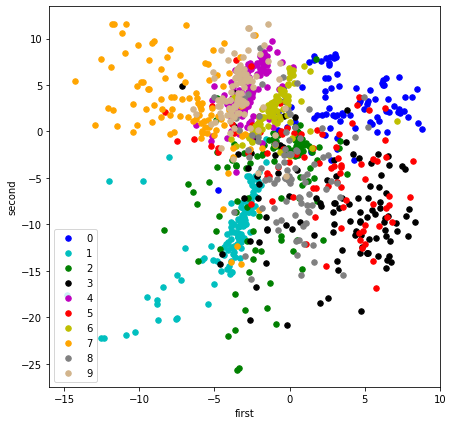

In [41]:
import pandas as pd
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!
plt.figure(figsize=(7,7))
x_lowDimension = Deep_AE.get_layer_output(x_test_2,7) 

lowDimensionDf = pd.DataFrame(data=x_lowDimension,columns=['first','second'])
y = pd.DataFrame(data=y_test_2,columns=['target'])
lowDimensionwDf = pd.concat([lowDimensionDf,y],axis=1)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['b','c','g','k','m','r','y','orange','grey','tan']

# first neuron and second neuron
plt.xlabel('first',fontsize=10)
plt.ylabel('second',fontsize=10)

for target,color in zip(targets,colors):
    indicesToKeep = lowDimensionwDf['target']==target
    plt.scatter(lowDimensionwDf.loc[indicesToKeep,'first']
              ,lowDimensionwDf.loc[indicesToKeep,'second']
              ,c=color
              ,s=30)
plt.legend(targets)
plt.show()

#### (a) describe your held-out validation setting in detail and report the minimum averaged reconstruction error achieved on your validation set; 
I use the code below to separate the X into the training set and validation set, taking up 80% and 20%, respectively.
```python
x_train, x_val  = np.split(X, [int(.8 * len(X))])
```
The minimum averaged reconstruction error achieved on my validation set is 0.04778087999237378.


#### (b) with those hyperparameters leading to the minimum averaged reconstruction error, plot the training and validation learning curves in the fine-tuning stage and describe when you stop the training.
I stop when the patience reachs its threshold.

#### (c) display the 2-D representations of 1,000 test images coloured with their digit labels (the colour scheme for visualisation needs to appear in the plot).
The 2-D representations are plotted above.

### <span style="color:red">=========== End of Assignment 8 ===========</span>

### <span style="color:red">=========== Assignment 9 ===========</span>

In [43]:
import copy
result2 = []
# tune the learning rate.
for lr in np.arange (0.2,1,0.1):
    print('lr : %s'%lr)
    
    Deep_AE_Pure = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid"])
    Deep_AE_Pure.set_lr(lr,momentum=0.5)
    Deep_AE_Pure.tie_layer_weights(1, 15)
    Deep_AE_Pure.tie_layer_weights(3, 13)
    Deep_AE_Pure.tie_layer_weights(5, 11)
    Deep_AE_Pure.tie_layer_weights(7, 9)
    Deep_AE_Pure.fit(x_train,x_train,batch_size=100,patience=25,
        epochs=1000,x_val=x_val,y_true_val=x_val)

    result2.append([lr,np.min(Deep_AE_Pure.val_err_hist)])
    print(result2)

lr : 0.2
287:	 train err: 0.0446	 val err: 0.0461	 patience: 25			
 Patience condition reached,best validation performance: 0.04483922305108609
[[0.2, 0.04483922305108609]]
lr : 0.30000000000000004
164:	 train err: 0.0461	 val err: 0.05274	 patience: 25		
 Patience condition reached,best validation performance: 0.046413016431005344
[[0.2, 0.04483922305108609], [0.30000000000000004, 0.046413016431005344]]
lr : 0.4000000000000001
212:	 train err: 0.04505	 val err: 0.04621	 patience: 25	
 Patience condition reached,best validation performance: 0.0459077071442336
[[0.2, 0.04483922305108609], [0.30000000000000004, 0.046413016431005344], [0.4000000000000001, 0.0459077071442336]]
lr : 0.5000000000000001
52:	 train err: 0.06653	 val err: 0.06821	 patience: 25	
 Patience condition reached,best validation performance: 0.060725250189837925
[[0.2, 0.04483922305108609], [0.30000000000000004, 0.046413016431005344], [0.4000000000000001, 0.0459077071442336], [0.5000000000000001, 0.060725250189837925]]

165:	 train err: 0.0476	 val err: 0.04842	 patience: 25		
 Patience condition reached,best validation performance: 0.04613317976336039


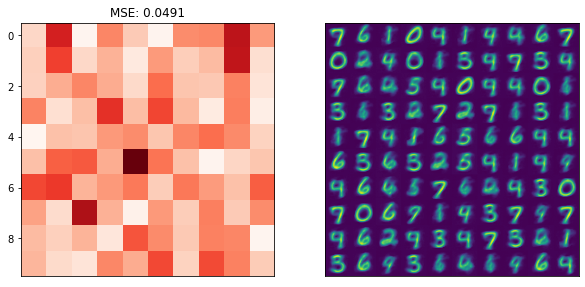

0.049084392996770115

In [49]:
#Create and train another network, this time without pretraining.
#You can use the plot_results function to see the results.
Deep_AE_Pure = Network([784,500,500,250,2,250,500,500,784],activations=["sigmoid"])
Deep_AE_Pure.set_lr(0.4,momentum=0.5)
Deep_AE_Pure.tie_layer_weights(1, 15)
Deep_AE_Pure.tie_layer_weights(3, 13)
Deep_AE_Pure.tie_layer_weights(5, 11)
Deep_AE_Pure.tie_layer_weights(7, 9)
Deep_AE_Pure.fit(x_train,x_train,batch_size=100,patience=25,
        epochs=1000,x_val=x_val,y_true_val=x_val)
plot_results(Deep_AE_Pure,x_test_2)

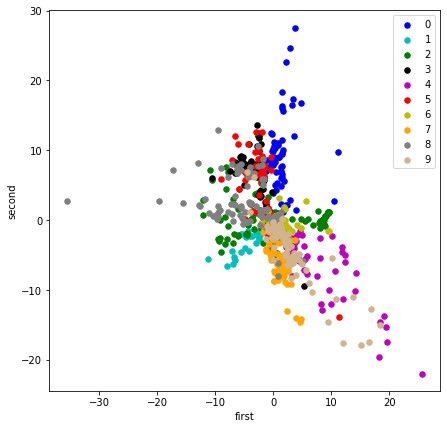

In [50]:
#Plot 2D representations for the new network.
plt.figure(figsize=(7,7))
x_lowDimension_pure = Deep_AE_Pure.get_layer_output(x_test_2,7) 

lowDimensionDf = pd.DataFrame(data=x_lowDimension_pure,columns=['first','second'])
y = pd.DataFrame(data=y_test_2,columns=['target'])
lowDimensionwDf = pd.concat([lowDimensionDf,y],axis=1)

targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['b','c','g','k','m','r','y','orange','grey','tan']

# first neuron and second neuron
plt.xlabel('first',fontsize=10)
plt.ylabel('second',fontsize=10)

for target,color in zip(targets,colors):
    indicesToKeep = lowDimensionwDf['target']==target
    plt.scatter(lowDimensionwDf.loc[indicesToKeep,'first']
              ,lowDimensionwDf.loc[indicesToKeep,'second']
              ,c=color
              ,s=30)
plt.legend(targets)
plt.show()

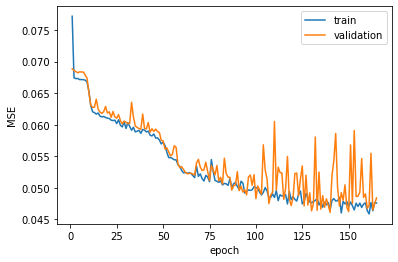

In [51]:
#Create a plot of training metrics.
plt.figure()
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.plot(range(1,len(Deep_AE_Pure.train_err_hist)+1),Deep_AE_Pure.train_err_hist,label='train')
plt.plot(range(1,len(Deep_AE_Pure.train_err_hist)+1),Deep_AE_Pure.val_err_hist,label='validation')
plt.legend() 
plt.show()

#### (a) describe your investigation in hyperparameter tuning and explicitly list those hyperparameter values that lead to the minimum averaged reconstruction error; 
You should set the learning rate to a large value, otherwise, it would be easy to stop in local optimization.
It set the learning rate to 0.4 and the minimum averaged reconstruction error is 0.04613317976336039.

### <span style="color:red">=========== End of Assignment 9 ===========</span>